In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
import subprocess
%matplotlib inline

##### some useful sites:
* http://research.jisao.washington.edu/data_sets/nco/
* http://nco.sourceforge.net/nco.html

### Start from Jan 1, 2015

In [2]:
#for yr in ('15','16','17'): # years
yr='17'
fdec=glob.glob('/results/SalishSea/nowcast-green/*dec'+str(int(yr)-1)+'/SalishSea_1d*_grid_T.nc')
fjan=glob.glob('/results/SalishSea/nowcast-green/*jan'+yr+'/SalishSea_1d*_grid_T.nc')
ffeb=glob.glob('/results/SalishSea/nowcast-green/*feb'+yr+'/SalishSea_1d*_grid_T.nc')
fmar=glob.glob('/results/SalishSea/nowcast-green/*mar'+yr+'/SalishSea_1d*_grid_T.nc')
fapr=glob.glob('/results/SalishSea/nowcast-green/*apr'+yr+'/SalishSea_1d*_grid_T.nc')
fmay=glob.glob('/results/SalishSea/nowcast-green/*may'+yr+'/SalishSea_1d*_grid_T.nc')
fjun=glob.glob('/results/SalishSea/nowcast-green/*jun'+yr+'/SalishSea_1d*_grid_T.nc')
fjul=glob.glob('/results/SalishSea/nowcast-green/*jul'+yr+'/SalishSea_1d*_grid_T.nc')
faug=glob.glob('/results/SalishSea/nowcast-green/*aug'+yr+'/SalishSea_1d*_grid_T.nc')
fsep=glob.glob('/results/SalishSea/nowcast-green/*sep'+yr+'/SalishSea_1d*_grid_T.nc')
foct=glob.glob('/results/SalishSea/nowcast-green/*oct'+yr+'/SalishSea_1d*_grid_T.nc')
fnov=glob.glob('/results/SalishSea/nowcast-green/*nov'+yr+'/SalishSea_1d*_grid_T.nc')

In [3]:
fJFM=fdec+fjan+ffeb
fAMJ=fmar+fapr+fmay
fJAS=fjun+fjul+faug
fOND=fsep+foct+fnov

In [4]:
# index 21 is 28.229916 m
foutJFM='/data/vdo/MEOPAR/test/meanDJF_deepest_cell_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline '+' '.join(fJFM)+' '+foutJFM,shell=True)

CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 1min 19s


b''

In [5]:
# index 21 is 28.229916 m
foutAMJ='/data/vdo/MEOPAR/test/meanMAM_deepest_cell_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline '+' '.join(fAMJ)+' '+foutAMJ,shell=True)

CPU times: user 24 ms, sys: 20 ms, total: 44 ms
Wall time: 8min 8s


b''

In [6]:
# index 21 is 28.229916 m
foutJAS='/data/vdo/MEOPAR/test/meanJJA_deepest_cell_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline '+' '.join(fJAS)+' '+foutJAS,shell=True)

CPU times: user 8 ms, sys: 16 ms, total: 24 ms
Wall time: 4min 35s


b''

In [7]:
# index 21 is 28.229916 m
foutOND='/data/vdo/MEOPAR/test/meanSON_deepest_cell_20'+yr+'.nc'
%time subprocess.check_output('ncra -v votemper,vosaline '+' '.join(fOND)+' '+foutOND,shell=True)

CPU times: user 32 ms, sys: 20 ms, total: 52 ms
Wall time: 11min 2s


b''

In [8]:
fout='/data/vdo/MEOPAR/test/seasonal_deepest_cell_20'+yr+'.nc'
flist=foutJFM+' '+foutAMJ+' '+foutJAS+' '+foutOND
%time subprocess.check_output('ncrcat '+flist+' '+fout,shell=True)

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 14.7 s


b''

In [9]:
f=nc.Dataset(fout, 'a')
f.variables.keys()

odict_keys(['bounds_lat', 'bounds_lon', 'deptht', 'deptht_bounds', 'nav_lat', 'nav_lon', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vosaline', 'votemper'])

In [10]:
[dt.datetime(1900,1,1)+dt.timedelta(seconds=ii) for ii in f.variables['time_centered']]

[datetime.datetime(2017, 1, 15, 0, 0),
 datetime.datetime(2017, 4, 16, 0, 0),
 datetime.datetime(2017, 7, 17, 0, 0),
 datetime.datetime(2017, 10, 16, 12, 0)]

In [11]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [12]:
deepest = np.argmin(mesh.variables['tmask'][:], axis=1)

In [13]:
deepest.shape

(1, 898, 398)

In [14]:
deepest2 = deepest - 1

In [15]:
deepest3 = np.ma.masked_array(deepest2, mask = mesh.variables['tmask'][:,0,...])
deepest3.shape

(1, 898, 398)

In [16]:
only_deepest = np.zeros((4,898,398))
for t in range(4):
    for j in range(898):
        for i in range(398):
            only_deepest[t,j,i] = f.variables['vosaline'][t,deepest2[0,j,i], j,i]

/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Warning: converting a masked element to nan.


In [17]:
only_deepest = np.ma.masked_array(only_deepest, 
                                  mask = 1 - mesh.variables['tmask'][0,0,...]*np.ones((4,1,1)))

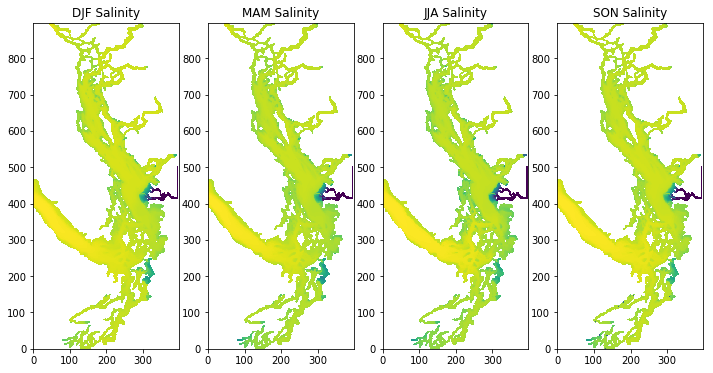

In [18]:
fig,ax=plt.subplots(1,4,figsize=(12,6))
ax[0].pcolormesh(only_deepest[0,:,:])
ax[0].set_title('DJF Salinity')
ax[1].pcolormesh(only_deepest[1,:,:])
ax[1].set_title('MAM Salinity')
ax[2].pcolormesh(only_deepest[2,:,:])
ax[2].set_title('JJA Salinity')
ax[3].pcolormesh(only_deepest[3,:,:])
ax[3].set_title('SON Salinity')

In [19]:
deepest_sal = f.createVariable('deep_S', 'f4', ('time_counter', 'y', 'x'))

In [20]:
deepest_sal[:] = only_deepest

In [21]:
only_deepest = np.zeros((4,898,398))
for t in range(4):
    for j in range(898):
        for i in range(398):
            only_deepest[t,j,i] = f.variables['votemper'][t,deepest2[0,j,i], j,i]

/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Warning: converting a masked element to nan.


In [22]:
only_deepest = np.ma.masked_array(only_deepest, 
                                  mask = 1 - mesh.variables['tmask'][0,0,...]*np.ones((4,1,1)))

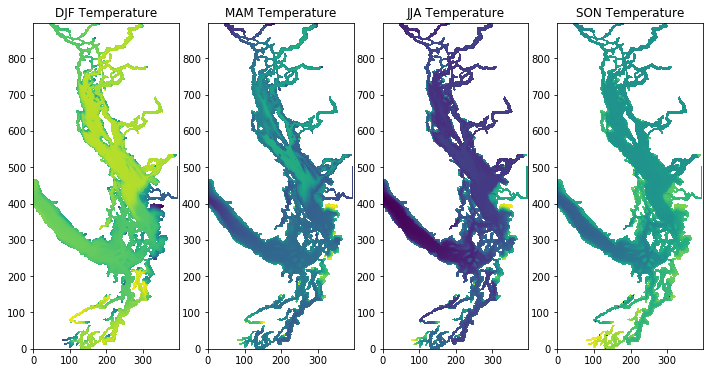

In [23]:
fig,ax=plt.subplots(1,4,figsize=(12,6))
ax[0].pcolormesh(only_deepest[0,:,:])
ax[0].set_title('DJF Temperature')
ax[1].pcolormesh(only_deepest[1,:,:])
ax[1].set_title('MAM Temperature')
ax[2].pcolormesh(only_deepest[2,:,:])
ax[2].set_title('JJA Temperature')
ax[3].pcolormesh(only_deepest[3,:,:])
ax[3].set_title('SON Temperature')

In [24]:
deepest_tem = f.createVariable('deep_T', 'f4', ('time_counter', 'y', 'x'))
deepest_tem[:] = only_deepest

In [26]:
deepest_ind = f.createVariable('deep_k', 'i4', ('y', 'x'))
deepest_ind[:] = deepest3[0,...]

In [27]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
mbathy = mesh.variables['mbathy'][0,:,:] 
gdepw = mesh.variables['gdepw_0'][0,:,:,:] 
gdept = mesh.variables['gdept_0'][0,:,:,:]
surface_tmask = mesh.variables['tmask'][0,0,:,:] 
surface_tmask = np.abs(surface_tmask-1) 
mesh.close() 
NEMO_bathy = np.zeros(mbathy.shape) 
deepest_TS = np.zeros(mbathy.shape)
for i in range(NEMO_bathy.shape[1]): 
    for j in range(NEMO_bathy.shape[0]): 
        level = mbathy[j,i] 
        NEMO_bathy[j,i] = gdepw[level,j,i]
        deepest_TS[j,i] = gdept[level, j, i]
NEMO_bathy = np.ma.masked_array(NEMO_bathy, mask = surface_tmask) 
deepest_TS = np.ma.masked_array(deepest_TS, mask = surface_tmask)

In [28]:
depth = f.createVariable('depth', 'f4', ('y', 'x'))
depth[:] = NEMO_bathy
deep_z = f.createVariable('deep_z', 'f4', ('y', 'x'))
deep_z[:] = deepest_TS

In [29]:
f.variables['deep_S']

<class 'netCDF4._netCDF4.Variable'>
float32 deep_S(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (4, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

In [30]:
f.variables['deep_T']

<class 'netCDF4._netCDF4.Variable'>
float32 deep_T(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (4, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

In [31]:
f.close()